In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
from read_help import read_adp_csv
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [29]:
year = 2000
dfs = {}
for i in range(7, 20, 1):
    dfs[f'{year+i}'] = read_adp_csv(year+i)
    dfs[f'{year+i}']['year'] = year+i


In [3]:

grouped_pos = [df.groupby('pos') for df in dfs.values()]

grouped_pos_count = [group['player'].count() for group in grouped_pos]


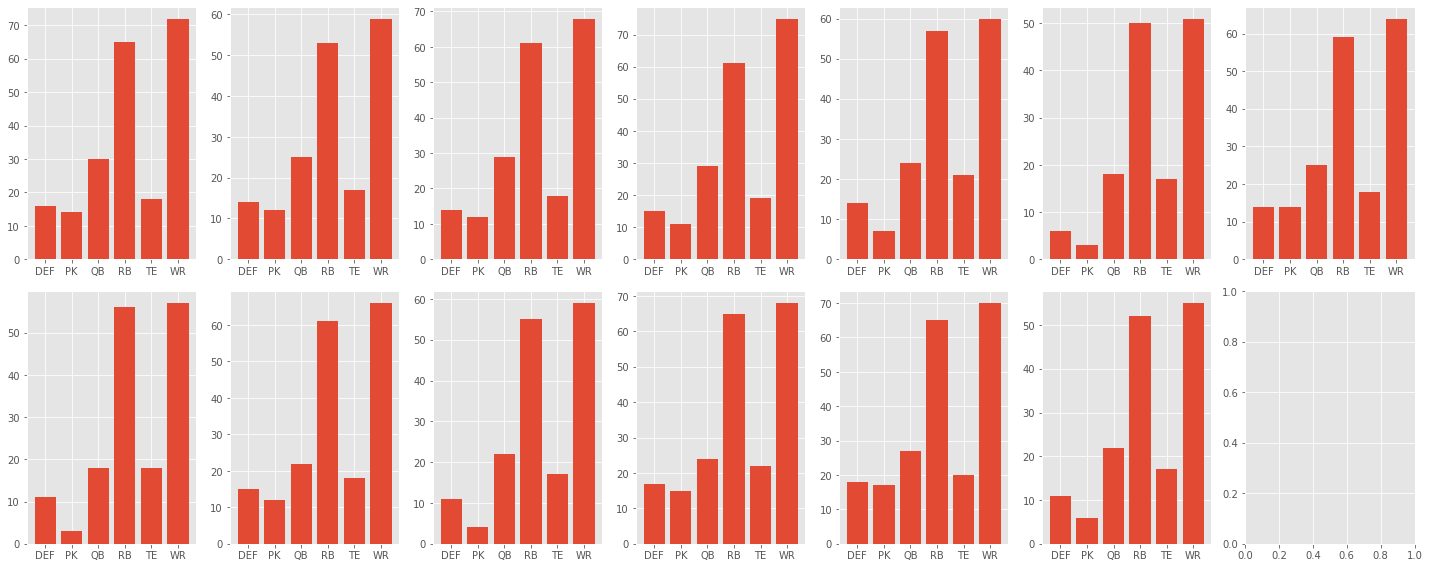

In [4]:
fig, axs = plt.subplots(2, 7, figsize=(20, 8))

for ax, data in zip(axs.flatten(), grouped_pos_count):
    ax.bar(data.index,data)

plt.tight_layout()


In [5]:
avg_pos = []
for p in grouped_pos:
    avg_pos.append(pd.Series(p['pick'].mean().sort_values()))
    
year_i = 2000
indexes = []
for i in range(7, 20, 1):
    indexes.append(year+i)

In [6]:
avg_pos = pd.DataFrame(avg_pos).reset_index().drop('index', axis=1)


In [7]:
years = pd.Series(list(dfs.keys()))
years.name='years'

In [8]:
#avg_pos = avg_pos.join(years, 'index')
avg_pos = avg_pos.set_index(years)

In [9]:
avg_pos

,RB,WR,QB,TE,DEF,PK
years,,,,,,
2007,7.098923,8.494306,9.333000,9.403889,11.310000,13.422857
2008,6.276792,7.284746,7.541200,8.757059,11.194286,13.701667
2009,6.916885,8.006912,8.650000,9.225556,11.464286,13.807500
2010,7.222131,8.330000,8.822759,8.847368,11.979333,13.619091
2011,6.725439,7.278000,7.803750,9.110952,10.780000,13.922857
2012,5.796400,6.496667,5.457222,7.827647,11.548333,11.743333
2013,6.370678,7.718594,8.660400,8.737222,11.484286,13.780714
2014,6.266071,6.712105,6.774444,8.183889,11.424545,12.730000
2015,6.705574,7.425000,8.330000,8.678333,12.010667,13.972500


In [17]:
qb_avg = avg_pos['WR'].mean()
qb_avg

7.411216969152126

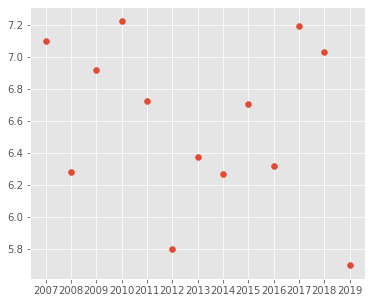

In [180]:
fig, ax = plt.subplots(1, figsize=(6, 5))
ax.scatter(avg_pos.index, avg_pos['RB'])

In [86]:
count = 0
for df in dfs.values():
    if count == 0:
        full_df = pd.DataFrame(df)
        count+=1
    else:
        full_df=full_df.merge(df, how='outer')
full_df

,high,low,num_drafted,overall,pick,player,pos,stdev,team,year
0,0.12,0.12,533.00,1.2,1.01,LaDainian Tomlinson,RB,0.0,NYJ,2007
1,0.12,0.12,421.00,2.2,1.02,Steven Jackson,RB,0.0,LAR,2007
2,0.12,0.12,248.00,3.5,1.03,Larry Johnson,RB,0.0,MIA,2007
3,0.12,0.12,417.00,4.6,1.05,Frank Gore,RB,0.0,BUF,2007
4,0.12,0.12,504.00,4.9,1.05,Joseph Addai,RB,0.0,FA,2007
5,0.12,0.12,466.00,6.3,1.06,Shaun Alexander,RB,0.0,FA,2007
6,0.12,0.12,409.00,7.8,1.08,Brian Westbrook,RB,0.0,FA,2007
7,0.12,0.12,453.00,8.3,1.08,Willie Parker,RB,0.0,WAS,2007
8,0.12,0.12,419.00,9.8,1.10,Rudi Johnson,RB,0.0,DET,2007
9,0.12,0.12,438.00,10.0,1.10,Reggie Bush,RB,0.0,SF,2007


In [98]:
full_df = full_df[full_df['num_drafted'] > 100]

rb_df = full_df[(full_df['pos'] == 'RB') & (full_df['low'] > 1)]
wr_df = full_df[(full_df['pos'] == 'WR') & (full_df['low'] > 1)]
qb_df = full_df[(full_df['pos'] == 'QB') & (full_df['low'] > 1)]
te_df = full_df[(full_df['pos'] == 'TE') & (full_df['low'] > 1)]
dst_df = full_df[(full_df['pos'] == 'DEF') & (full_df['low'] > 1)]
k_df = full_df[(full_df['pos'] == 'PK') & (full_df['low'] > 1)]


In [99]:
rb_high = rb_df['pick'].max()
rb_low = rb_df['pick'].min()

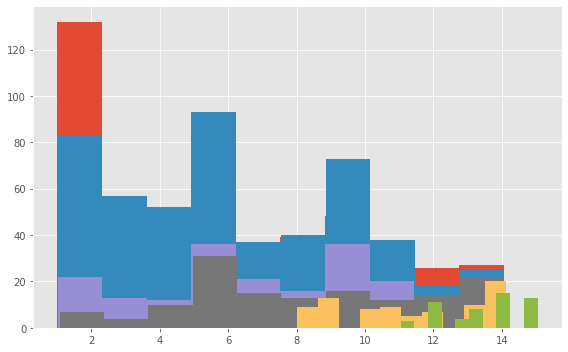

In [100]:
fig, ax = plt.subplots(1, figsize=(8,5))
ax.hist(rb_df['pick'], bins=10)
ax.hist(wr_df['pick'], bins=10)
ax.hist(qb_df['pick'], bins=10)
ax.hist(te_df['pick'], bins=10)
ax.hist(dst_df['pick'], bins=10)
ax.hist(k_df['pick'], bins=10)
plt.tight_layout()

In [79]:
rb_df[rb_df['num_drafted'] > 100].sort_values('pick')

,high,low,num_drafted,overall,pick,player,pos,stdev,team,year
215,1.01,1.05,813.0,1.4,1.01,LaDainian Tomlinson,RB,0.7,LAC,2008
597,1.01,1.06,461.0,1.4,1.01,Chris Johnson,RB,0.7,TEN,2010
395,1.01,1.04,529.0,1.3,1.01,Adrian Peterson,RB,0.6,MIN,2009
1135,1.01,2.10,512.0,1.3,1.01,Adrian Peterson,RB,1.1,MIN,2013
807,1.01,1.04,135.0,1.5,1.01,Adrian Peterson,RB,0.8,MIN,2011
2065,1.01,1.04,709.0,1.4,1.01,Todd Gurley,RB,0.6,LAR,2018
990,1.01,1.05,160.0,2.0,1.02,Arian Foster,RB,1.0,HOU,2012
1855,1.01,1.04,349.0,2.2,1.02,LeVeon Bell,RB,0.7,PIT,2017
1492,1.01,1.08,269.0,1.7,1.02,Adrian Peterson,RB,1.0,MIN,2015
598,1.01,1.04,286.0,2.1,1.02,Adrian Peterson,RB,0.7,MIN,2010


In [65]:
rb_df['pick'].max()

14.08

In [66]:
rb_df['pick'].min()

1.01